In [2]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import warnings
warnings.filterwarnings('ignore')

In [3]:
#import dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

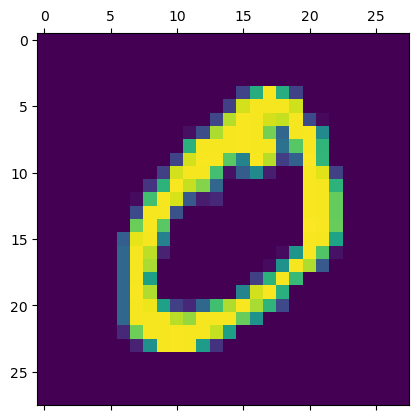

In [4]:
#Lets plot graphically
plt.matshow(X_train[1])

In [5]:
y_train[1]

np.uint8(0)

In [6]:
#Print first numbers array
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
X_train=X_train/255
X_test=X_test/255

In [8]:
#Flattening array (28 * 28) - 784
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [11]:
X_train_flattened.shape

(60000, 784)

In [12]:
#build model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential

model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='sigmoid')
])

#compile model
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#Lets train model
model.fit(X_train_flattened, y_train, epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8732 - loss: 0.4234
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9446 - loss: 0.1990 
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9576 - loss: 0.1540
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9624 - loss: 0.1357
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9677 - loss: 0.1149


In [13]:
#evaluate model on testing data
model.evaluate(X_test_flattened, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9761 - loss: 0.0904   


[0.09043135493993759, 0.9761000275611877]

In [14]:
#predict result for testing data
y_predict = model.predict(X_test_flattened)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [20]:
y_predict[2]

array([1.8820740e-04, 9.9999940e-01, 7.3779352e-02, 1.7113920e-02,
       7.9801464e-03, 6.8284022e-03, 3.8186856e-02, 2.3426147e-01,
       2.2553384e-01, 3.9441311e-03], dtype=float32)

In [ ]:
##np.argmax() finds the index of the biggest value in the array.

In [21]:
index = np.argmax(y_predict[2])
print("This no is:", index)

This no is: 1


In [16]:
y_test[2]

np.uint8(1)

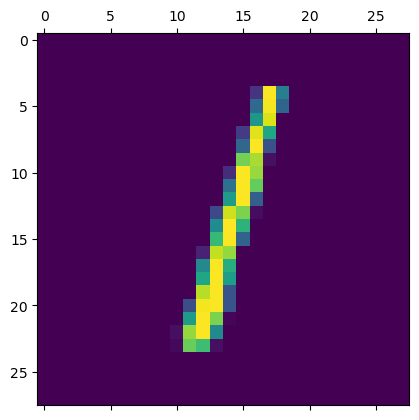

In [22]:
plt.matshow(X_test[2])

In [23]:
model.save("digit_model.keras")